In [14]:
import numpy as np
import scipy
from matplotlib import pylab as plt
from scipy.signal import find_peaks
# %matplotlib inline

In [75]:
def open_file(name_of_file): 
    values = []
    time = []
    with open(name_of_file) as file:
        for line in file:
            line = line.split(',')
            value = int(line[1])
            values.append(value)
            time.append(line[0])
    return values

def plot(values):
    x = np.arange(0, 100)
    y = np.array(values[:100])
    plt.plot(x, y)
    plt.show()
    
def Filter(values):
    filter_ = []
    for j in range(len(values)):
    # а если j==0?  #туда записывается среднее от [-1]-(крайний элемент массива), [0] и [1] (или это не правильно?)
        if j == len(values) - 1:
            filter_.append((values[j - 1] + values[0] + values[j])/3)
        else:
            filter_.append((values[j - 1] + values[j + 1] + values[j])/3)
    return filter_

def peak_detection(filter_):
    peaks = scipy.signal.find_peaks(filter_, height = [515, 700])
    peakss = np.array(peaks[1]['peak_heights'])
    
    return peakss

def ploting_peaks(peaks,values):
    x = []
    y = []
    for index,val in enumerate(values):
        if val in peaks:
            
            x.append(index)
            y.append(val)
    x1 = np.arange(0, len(values))
    y1 = np.array(values)
    plt.plot(x1, y1)
    plt.plot(x, y, 'x')
    plt.show()

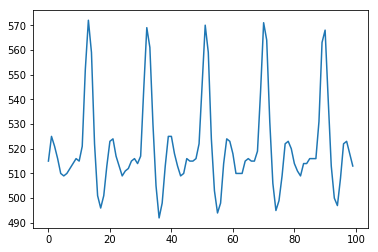

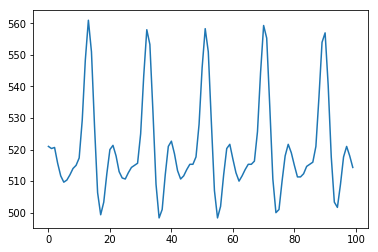

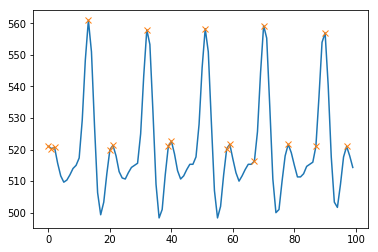

In [123]:
values_1 = open_file("Contact.txt")

plot(values_1)

filtered_values_1 = Filter(values_1)

plot(filtered_values_1)

peakss = peak_detection(filtered_values_1[:250])

ploting_peaks(peakss,filtered_values_1[:100])

In [ ]:
#general comments:
# 1. Make functions(like Plot(x,y), filter(x,y) and etc.). Put them in ONE cell in the beginning.Call them.
# DRY(dont repeat yourself).
# 2. All import in one cell in the very beginning of the file
# 3. Try to plot peaks and graphs on the same figure(graph as lines and peaks as dots). Lets check how the 
# find_peaks_cwt fucntion works.

In [126]:
from peakdetect import peakdetect

In [129]:
peaks2 = peakdetect(filtered_values_1[:250],lookahead=5)

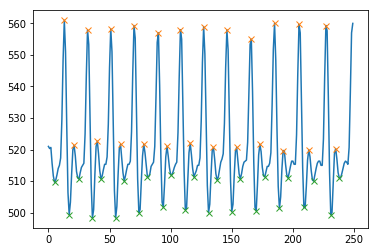

In [142]:
peaks_max = []
for i in peaks2[0]:
    peaks_max.append(i[1])
    
peaks_max_ind = []
for j in peaks2[0]:
    peaks_max_ind.append(j[0])
    
peaks_min = []
for i in peaks2[1]:
    peaks_min.append(i[1])
    
peaks_min_ind = []
for j in peaks2[1]:
    peaks_min_ind.append(j[0])

x1 = np.arange(0, len(filtered_values_1[:250]))
y1 = np.array(filtered_values_1[:250])
plt.plot(x1, y1)
plt.plot(peaks_max_ind, peaks_max, 'x')
plt.plot(peaks_min_ind, peaks_min, 'x')
plt.show()